In [12]:
%pylab inline
%reload_ext autoreload
%autoreload 2
import random

Populating the interactive namespace from numpy and matplotlib


# Counterfactual Regret Minimization

### Description
The idea is to use the concept of "regret" in a game-theoretic world to learn the the best possible strategy to play given an opponents strategy.

This algorithm will coverge to MSNE (Nash Equilibrium).

[See article](http://modelai.gettysburg.edu/2013/cfr/cfr.pdf)

In [10]:
# Define constants
ROCK, PAPER, SCISSORS = 0, 1, 2
NUM_ACTIONS = 3

# np arrays for the two strageties
# start your own strategy as all 0s
strategy = np.zeros(NUM_ACTIONS, dtype=float)
oppStrategy = np.array([0.4, 0.3, 0.3])

# sums for averaging later on
regretSum = np.zeros(NUM_ACTIONS, dtype=float)
strategySum = np.zeros(NUM_ACTIONS, dtype=float)

In [13]:
# returns the value for player 1 given
# action choices of player one and player two
def value(p1, p2):
    if (p1 == ROCK and p2 == SCISSORS):
        return 1
    if (p1 == PAPER and p2 == ROCK):
        return 1
    if (p1 == SCISSORS and p2 == PAPER):
        return 1
    elif (p1 == p2):
        return 0
    else:
        return -1
    
def getStrategy():
    normalizingSum = 0
    # for each action (e.g. rock, paper, scissors)
    for a in range(0, NUM_ACTIONS):
        # the prob that our player plays that action
        # is the regret sum (if positive), 0 otherwise
        strategy[a] = regretSum[a] if regretSum[a] > 0 else 0
        # add the probability to the normalization constant
        normalizingSum += strategy[a]
    for a in range(0, NUM_ACTIONS):
        # for every sigma(i), normalize if neccesary
        if (normalizingSum > 0):
            strategy[a] = strategy[a] / normalizingSum
        else:
            strategy[a] = 1.0 / NUM_ACTIONS
        strategySum[a] += strategy[a]
    return strategy

print(getStrategy())

def getAction(strategy):
    r = np.random.random()
    a = 0
    cumProbability = 0
    while (a < NUM_ACTIONS - 1):
        cumProbability += strategy[a]
        if (r < cumProbability):
            break
        a = a + 1
    return a

[0.33333333 0.33333333 0.33333333]


In [75]:
def train(iterations):
    actionUtility = np.zeros(NUM_ACTIONS)
    for i in range(0, iterations):
        strategy = getStrategy()
        myAction = getAction(strategy)
        oppAction = getAction(oppStrategy)
        actionUtility[oppAction] = 0
        actionUtility[0 if oppAction == NUM_ACTIONS - 1 else oppAction + 1] = 1
        actionUtility[NUM_ACTIONS - 1 if oppAction == 0 else oppAction - 1] = -1
        for x in range(0, NUM_ACTIONS):
            regretSum[x] += actionUtility[x] - actionUtility[myAction]
            
def getAverageStrategy():
    avgStrategy = np.zeros(NUM_ACTIONS, dtype=float)
    normalizingSum = 0
    for a in range(0, NUM_ACTIONS):
        normalizingSum += strategySum[a]
        
    for a in range(0, NUM_ACTIONS):
        if (normalizingSum > 0):
            avgStrategy[a] = strategySum[a] / normalizingSum
        else:
            avgStrategy[a] = 1 / NUM_ACTIONS
    return avgStrategy

([<matplotlib.lines.Line2D at 0x110ac6f60>], -8.995, array([0., 0., 1.]))

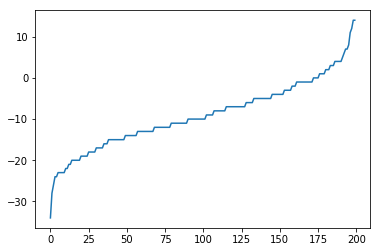

In [82]:
train(1000)

bestStrat = getAverageStrategy()
vvv = []
for r in range(0, 200):
    vv = 0
    for i in range(0, 100):
        strat = getStrategy()
        strat = bestStrat
        action = getAction(strat)
        otherAction = getAction(oppStrategy)
        vv += value(action, otherAction)
    vvv.append(vv)
plot(sorted(vvv)), np.mean(vvv), bestStrat

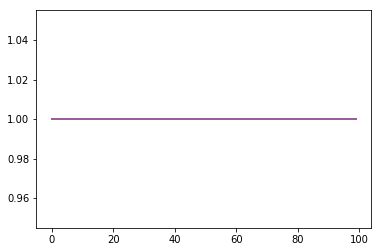

In [83]:
strategies = []
for x in range(0, 5):
    strategies = [getAction(getStrategy()) for i in range(0, 100)]
    plot(sorted(strategies))

In [76]:
# we are player one

cum_regret = np.zeros(3, dtype=float)

def bad_strat():
    num1 = np.random.random()
    if (num1 <= .3):
        p1_s = ROCK
    elif (num1 <= .6):
        p1_S = PAPER
    else:
        p1_s = SCISSORS
    return p1_s
    
for i in range(0, 1000):
    p1_s = 0
    p2_S = 0
    num1 = np.random.random()
    num2 = np.random.random()
    
    if (np.sum(cum_regret) == 0):
        p1_s = np.random.choice(3, p=[1/3, 1/3, 1/3])
    else:
        p1_s = np.random.choice(3, p=cum_regret)
    
    if (num2 <= .3):
        p2_s = ROCK
    elif (num2 <= 1):
        p2_s = PAPER
    else:
        p2_s = SCISSORS
    
    score = value(p1_s, p2_s)
    regrets = [0, 0, 0]
#     print(p1_s, p2_s, score)
    for k in range(0, 3):
        if (k == p1_s):
            regrets[k] = 0
        else:
            test = (value(k, p2_s)-score)
            regrets[k] = test if test > score else 0
    ss = np.sum(regrets)
    for l in range(0, 3):
        cum_regret[l] += regrets[l]
    cum_regret = cum_regret / (1 if cum_regret.sum() == 0 else cum_regret.sum())
print(cum_regret)        

[0.03187615 0.31765857 0.65046528]


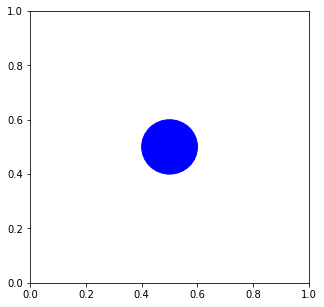

In [8]:
import matplotlib.pyplot as plt

circle2 = plt.Circle((0.5, 0.5), 0.1, color='blue')

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
fig.set_size_inches(5, 5)
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle2)